In [47]:
# -*- coding: utf-8 -*-
# -*- author : Lokman Mheni - Fabio Palmisano -*-
# -*- date : 2024-04-20 -*-
# -*- Last revision: 2024-05-14 *-
# -*- python version : 3.11.9 -*-
# -*- Description: Logistic Regression-*-

In [48]:
import numpy as np
import pandas as pd
import networkx as nx
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

from itertools import combinations
from collections import defaultdict
from tqdm import tqdm

#!pip install grakel
from grakel import GraphKernel
from grakel.utils import graph_from_networkx
from tqdm import tqdm


tr = pd.read_csv( 'data/to_read.csv' )


In [49]:
tr.head()

,user_id,book_id
0,9,8
1,15,398
2,15,275
3,37,7173
4,34,380


In [50]:
# Check how many times each book has been added to 'to read'
tr['book_id'].value_counts()

book_id
47      2772
143     1967
113     1840
13      1812
11      1767
        ... 
6297       1
7951       1
4434       1
9124       1
8946       1
Name: count, Length: 9986, dtype: int64

In [51]:
# Check how many times a book has only one user who added it to 'to read'
(tr['book_id'].value_counts() < 50).sum()

5641

In [52]:
# Create a dictionary where the keys are user_ids and the values are sets of book_ids
user_books = defaultdict(set)

# Populate the dictionary
for _, row in tqdm(tr.iterrows(), total=tr.shape[0]):
    user_books[row['user_id']].add(row['book_id'])


100%|██████████| 912705/912705 [00:18<00:00, 50304.75it/s]


In [53]:
import random

# Select a random subset of users
user_subset = random.sample(list(user_books.keys()), 1000)

# Create an empty graph
G_user_books_sample = nx.Graph()

# Iterate over each user in the subset
for user_id in tqdm(user_subset, total=len(user_subset)):
    # Get the books for this user
    books = user_books[user_id]
    
    # Generate all pairs of books for this user
    book_pairs = combinations(books, 2)
    
    # Add edges between all pairs of books
    for book_pair in book_pairs:
        G_user_books_sample.add_edge(*book_pair, user_id=user_id)

# Print the number of nodes and edges in the sampled graph
print(len(G_user_books_sample.nodes()))
print(len(G_user_books_sample.edges()))

100%|██████████| 1000/1000 [00:00<00:00, 2633.24it/s]

5865
285272


In [54]:
number_to_read =  tr['book_id'].value_counts()
number_to_read = number_to_read.apply(lambda x: 1 if x >= 100 else 0)
number_to_read

book_id
47      1
143     1
113     1
13      1
11      1
       ..
6297    0
7951    0
4434    0
9124    0
8946    0
Name: count, Length: 9986, dtype: int64

In [55]:
number_to_read.count()

9986

In [56]:
number_to_read.value_counts()

count
0    7713
1    2273
Name: count, dtype: int64

In [57]:
nx.set_node_attributes(G_user_books_sample, number_to_read.to_dict(), 'to_read')

In [58]:
# Can we compare what we have in graph_labels and what we have in the graph nodes ? 
# The answer is yes, we can compare the two lists and check if they are the same.
# We can do this by using the following code:
set(G_user_books_sample.nodes()).issubset(set(number_to_read.index))


True

In [59]:
#check in G_user_books_sample the proportion of nodes set to label 1 (to read) and which are set to 0 (not to read)
to_read = 0
not_to_read = 0
for node in G_user_books_sample.nodes(data=True):
    if node[1]['to_read'] == 1:
        to_read += 1
    else:
        not_to_read += 1
print(to_read, not_to_read)

2179 3686


In [60]:
graph_labels = nx.get_node_attributes(G_user_books_sample, 'to_read')
graph_labels

{4802: 0,
 8646: 0,
 5895: 0,
 8: 1,
 4845: 1,
 9390: 0,
 2675: 1,
 922: 1,
 9355: 0,
 1937: 1,
 2194: 1,
 3607: 1,
 1175: 1,
 923: 1,
 3613: 0,
 2463: 1,
 928: 1,
 1062: 1,
 299: 1,
 947: 1,
 54: 1,
 7097: 0,
 192: 1,
 452: 1,
 1095: 1,
 200: 1,
 1353: 1,
 713: 1,
 6861: 1,
 8526: 0,
 2254: 1,
 3668: 1,
 5846: 0,
 87: 1,
 8151: 1,
 1114: 1,
 3681: 0,
 2019: 0,
 2916: 1,
 5607: 0,
 7272: 1,
 1002: 1,
 109: 1,
 241: 1,
 3318: 1,
 1917: 1,
 1440: 1,
 36: 1,
 1028: 1,
 262: 1,
 551: 1,
 749: 1,
 112: 1,
 2065: 1,
 1842: 0,
 979: 1,
 437: 1,
 470: 1,
 533: 1,
 694: 1,
 1499: 1,
 5152: 0,
 5382: 0,
 440: 1,
 8486: 0,
 9483: 0,
 4607: 0,
 975: 1,
 754: 1,
 7731: 0,
 4692: 0,
 8888: 0,
 3898: 0,
 253: 1,
 3134: 1,
 3135: 1,
 225: 1,
 261: 1,
 485: 1,
 560: 1,
 50: 1,
 83: 1,
 471: 1,
 94: 1,
 129: 1,
 3464: 0,
 13: 1,
 14: 1,
 3085: 0,
 1168: 1,
 1041: 1,
 8212: 0,
 2328: 0,
 410: 1,
 4126: 0,
 8481: 0,
 1570: 1,
 1571: 1,
 1318: 0,
 2342: 1,
 2344: 0,
 5804: 0,
 557: 1,
 5550: 0,
 177: 1,
 1

In [61]:
seed = 42
# Import Logistic Regression
from sklearn.linear_model import LogisticRegression

## We want for each node take is degree, closeness centrality, betweeness centrality as features and that make a model to predict if it's a blockbuster (1 in to read) or not 
# Create a DataFrame with the degree, closeness centrality, and betweenness centrality of each node
node_features = pd.DataFrame(index=G_user_books_sample.nodes())

# Calculate the degree of each node
node_features['degree'] = pd.Series(dict(G_user_books_sample.degree()))

# Calculate the closeness centrality of each node
node_features['closeness'] = pd.Series(nx.closeness_centrality(G_user_books_sample))

# Calculate the betweenness centrality of each node
node_features['betweenness'] = pd.Series(nx.betweenness_centrality(G_user_books_sample))

#Calculate the clustering coefficient of each node
node_features['clustering'] = pd.Series(nx.clustering(G_user_books_sample))

# Calculate the eigenvector centrality of each node
node_features['eigenvector'] = pd.Series(nx.eigenvector_centrality(G_user_books_sample))

# Calculate the pagerank of each node
node_features['pagerank'] = pd.Series(nx.pagerank(G_user_books_sample))

# Calculate the average neighbor degree of each node
node_features['average_neighbor_degree'] = pd.Series(nx.average_neighbor_degree(G_user_books_sample))

# Merge the node features with the graph labels
node_features = node_features.merge(pd.Series(graph_labels, name ='graph_labels'), left_index=True, right_index=True)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(node_features.drop('graph_labels', axis=1), node_features['graph_labels'], test_size=0.3, random_state=seed)

# Train a simple model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

print(y_pred)
# Calculate the accuracy of the model
accuracy_score(y_test, y_pred)

#F1 score
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

# Print the results
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))


# Print the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

pd.DataFrame({'Real': y_test, 'Predicted': y_pred})


[0 1 1 ... 1 0 1]
Accuracy:  0.8170454545454545
F1 Score:  0.7228915662650602


,Real,Predicted
7337,0,0
3201,0,1
240,1,1
7018,0,0
2188,0,0
...,...,...
3078,0,0
5073,0,0
206,1,1
4137,0,0


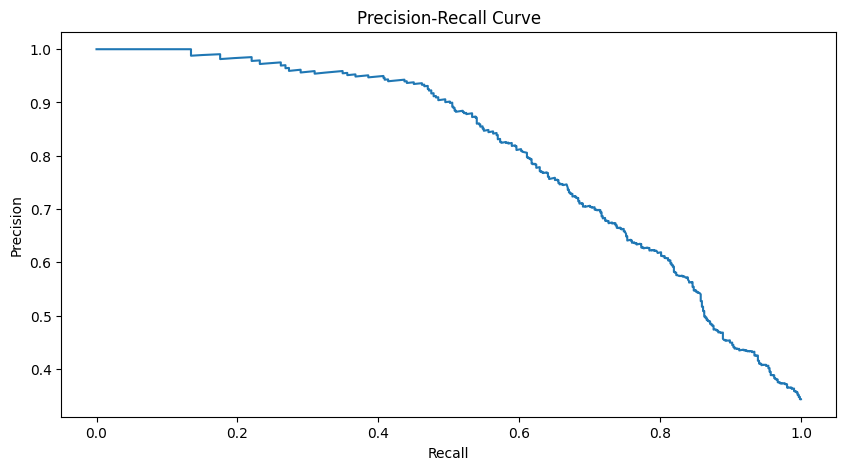

In [70]:
from sklearn.metrics import precision_recall_curve

# Get the probabilities of the positive class
y_scores = model.predict_proba(X_test)[:, 1]

# Get the precision and recall values for different thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Find the threshold that gives the best F1 score
f1_scores = 2*recall*precision / (recall + precision)
best_threshold = thresholds[np.argmax(f1_scores)]

# Use this threshold to predict the classes
y_pred = (y_scores > best_threshold).astype(int)

# Print the precision-recall curve for the model 
plt.figure(figsize=(10, 5))
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

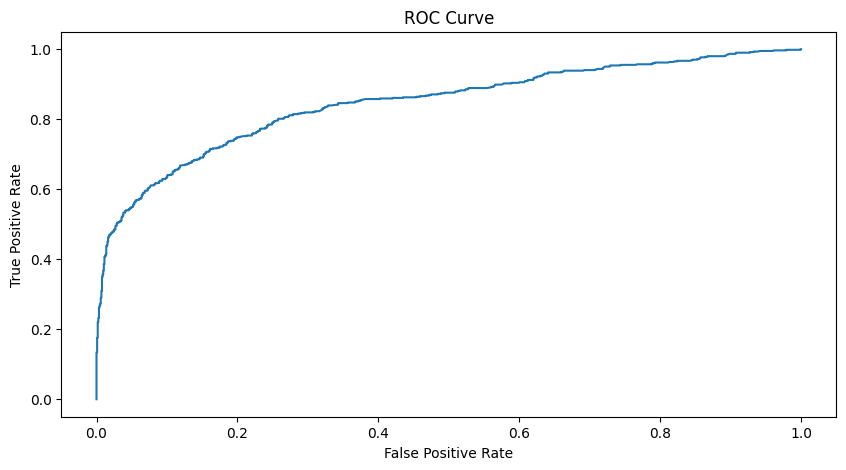

In [71]:
# Plot the ROC curve
from sklearn.metrics import roc_curve

# Get the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Plot the ROC curve
plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


In [64]:
node_features

,degree,closeness,betweenness,clustering,eigenvector,pagerank,average_neighbor_degree,graph_labels
4802,34,0.407317,0.000011,0.723708,0.002757,0.000086,252.764706,0
8646,45,0.421477,0.000018,0.750505,0.003410,0.000093,255.022222,0
5895,16,0.367585,0.000030,0.475000,0.000605,0.000065,135.750000,0
8,1134,0.549292,0.013908,0.103154,0.085371,0.001700,217.619929,1
4845,228,0.474209,0.000586,0.260762,0.016888,0.000358,232.140351,1
...,...,...,...,...,...,...,...,...
9851,48,0.414672,0.000000,1.000000,0.004406,0.000094,278.854167,0
6305,43,0.400931,0.000000,1.000000,0.003971,0.000086,270.883721,0
6908,43,0.400931,0.000000,1.000000,0.003971,0.000086,270.883721,0
3925,43,0.400931,0.000000,1.000000,0.003971,0.000086,270.883721,0


In [73]:
# Now can we try to make different combinaisons of features to see what has the best accuracy and F1 score and store the result in a datafram in order to print the best combinaison
from sklearn.metrics import f1_score

# Create a DataFrame to store the results
results = pd.DataFrame(columns=['features', 'accuracy', 'f1_score'])

# Iterate over all possible combinations of features
for i in range(1, len(node_features.columns) - 1):
    for features in combinations(node_features.columns[:-1], i):
        print(features)
        # Split the data into train and test sets
        X_train, X_test, y_train, y_test = train_test_split(node_features[list(features)], node_features['graph_labels'], test_size=0.3, random_state=seed)

        # Train a simple model
        model = LogisticRegression()
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate the accuracy and F1 score of the model
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

       # Append the results to the DataFrame
        results.loc[len(results)] = [features, accuracy, f1]
        print(accuracy, f1)

# Print the results
results.sort_values('f1_score', ascending=False).head(10)

# Print the best combinaison
best_combinaison = results.sort_values('f1_score', ascending=False).iloc[0]
print("Best combinaison of features:")
print(best_combinaison['features'])
print("Accuracy:", best_combinaison['accuracy'])
print("F1 Score:", best_combinaison['f1_score'])


('degree',)
0.8079545454545455 0.6927272727272727
('closeness',)
0.8096590909090909 0.6883720930232557
('betweenness',)
0.6568181818181819 0.0
('clustering',)
0.7965909090909091 0.7145135566188198
('eigenvector',)
0.6625 0.03257328990228013
('pagerank',)
0.6568181818181819 0.0
('average_neighbor_degree',)
0.6204545454545455 0.1279373368146214
('degree', 'closeness')
0.8085227272727272 0.6933575978161964
('degree', 'betweenness')
0.8079545454545455 0.6927272727272727
('degree', 'clustering')
0.8193181818181818 0.7249134948096886
('degree', 'eigenvector')
0.8079545454545455 0.6927272727272727
('degree', 'pagerank')
0.8079545454545455 0.6927272727272727
('degree', 'average_neighbor_degree')
0.8096590909090909 0.6951774340309372
('closeness', 'betweenness')
0.8096590909090909 0.6883720930232557
('closeness', 'clustering')
0.8079545454545455 0.7243066884176182
('closeness', 'eigenvector')
0.8090909090909091 0.6848030018761726
('closeness', 'pagerank')
0.8096590909090909 0.6883720930232557
(

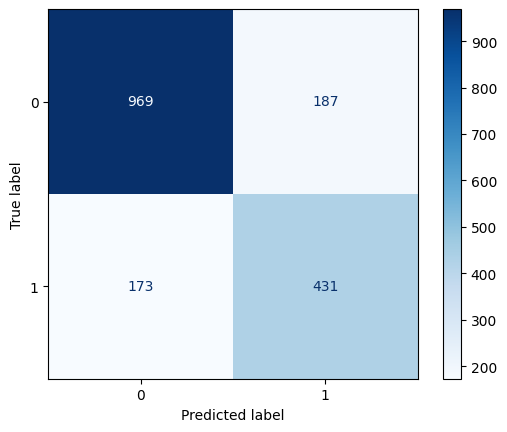

In [72]:
# Plot the matrix of confusion
from sklearn.metrics import ConfusionMatrixDisplay

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.show()



In [74]:
# Make the same but with an other model 
from sklearn.ensemble import RandomForestClassifier

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(node_features[list(best_combinaison['features'])], node_features['graph_labels'], test_size=0.3, random_state=seed)

# Train a simple model
model = RandomForestClassifier(random_state=seed)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy_score(y_test, y_pred)

# Print the results
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))

Accuracy:  0.7931818181818182
F1 Score:  0.695142378559464


In [75]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(node_features.drop('graph_labels', axis=1), node_features['graph_labels'], test_size=0.3, random_state=seed)

# Train a simple model
model = RandomForestClassifier(random_state=seed)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

print(y_pred)
# Calculate the accuracy of the model
accuracy_score(y_test, y_pred)

#F1 score
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

# Print the results
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))


# Print the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

pd.DataFrame({'Real': y_test, 'Predicted': y_pred})

[0 0 1 ... 1 1 1]
Accuracy:  0.7960227272727273
F1 Score:  0.6960203217612193


,Real,Predicted
7337,0,0
3201,0,0
240,1,1
7018,0,0
2188,0,0
...,...,...
3078,0,0
5073,0,0
206,1,1
4137,0,1


In [76]:
#Try with SVM
from sklearn.svm import SVC

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(node_features.drop('graph_labels', axis=1), node_features['graph_labels'], test_size=0.3, random_state=seed)

# Train a simple model
model = SVC(probability=True)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

print(y_pred)
# Calculate the accuracy of the model
accuracy_score(y_test, y_pred)

#F1 score
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

# Print the results
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))


# Print the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

pd.DataFrame({'Real': y_test, 'Predicted': y_pred})

[0 0 1 ... 1 0 1]
Accuracy:  0.8147727272727273
F1 Score:  0.6859344894026976


,Real,Predicted
7337,0,0
3201,0,0
240,1,1
7018,0,0
2188,0,0
...,...,...
3078,0,0
5073,0,0
206,1,1
4137,0,0
